In [3]:
import numpy as np 
import pandas as pd

import hydra
from omegaconf import DictConfig

In [4]:
data = pd.read_csv("data/raw/spam.csv")
data

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [5]:
data.columns

Index(['Category', 'Message'], dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
data.isna().sum()

Category    0
Message     0
dtype: int64

In [8]:
data['Spam']=data['Category'].apply(lambda x:1 if x=='spam' else 0)
data.head(5)

,Category,Message,Spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data.Message,data.Spam,test_size=0.25)

In [10]:
#CounterVectorizer Convert the text into matrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

from sklearn.pipeline import Pipeline
clf=Pipeline([
    ('vectorizer',CountVectorizer()),
    ('nb',MultinomialNB())
])

In [11]:
clf.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [12]:
emails=[
    'Sounds great! Are you home now?',
    'Will u meet ur dream partner soon? Is ur career off 2 a flyng start? 2 find out free, txt HORO followed by ur star sign, e. g. HORO ARIES'
]

In [13]:
clf.predict(emails)

array([0, 1])

In [14]:
clf.score(X_test,y_test)

0.9849246231155779

In [15]:
## OTHER METHOD
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

X= data['Message']
y = data['Category']

print(data)

print(X)

print(y)

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#Create a Random Forest classifier
rf_classifier = RandomForestClassifier()


#Create a TF-IDF vectorizer --> transforms it into a numerical representation
vectorizer = TfidfVectorizer()

#Fit the vectorizer on the training data and transform both the training and testing data
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)


#Initialize and train the RandomForestClassifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_vectorized, y_train)

#Make predictions on the test data
y_pred = rf_classifier.predict(X_test_vectorized)



#Creating Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,pos_label='spam')
recall = recall_score(y_test, y_pred,pos_label='spam')
f1 = f1_score(y_test, y_pred,pos_label='spam')



print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)



#Evaluate the performance of the classifier
print(classification_report(y_test, y_pred))

Accuracy: 0.97847533632287
Precision: 1.0
Recall: 0.8389261744966443
F1-score: 0.9124087591240876
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       966
        spam       1.00      0.84      0.91       149

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



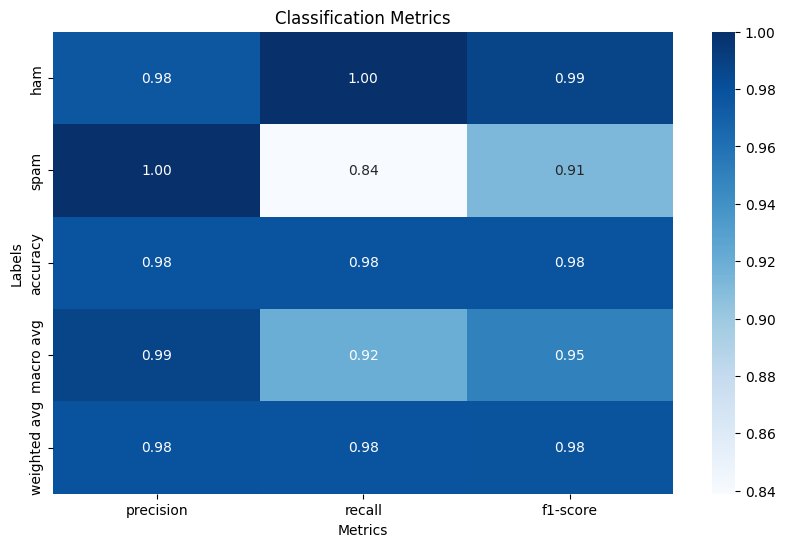

In [19]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

report = classification_report(y_test, y_pred, output_dict=True)
df = pd.DataFrame(report).transpose()
df.drop('support', axis=1, inplace=True)
plt.figure(figsize=(10, 6))
sns.heatmap(df, annot=True, cmap='Blues', fmt=".2f")
plt.xlabel('Metrics')
plt.ylabel('Labels')
plt.title('Classification Metrics')
plt.show()

In [20]:
@hydra.main(config_path="../config", config_name="main", version_base=None)
def read_data(config: DictConfig):

    data=pd.read_csv(config.data.raw)

    return data

In [21]:
read_data()

usage: ipykernel_launcher.py [--help] [--hydra-help] [--version]
                             [--cfg {job,hydra,all}] [--resolve]
                             [--package PACKAGE] [--run] [--multirun]
                             [--shell-completion] [--config-path CONFIG_PATH]
                             [--config-name CONFIG_NAME]
                             [--config-dir CONFIG_DIR]
                             [--experimental-rerun EXPERIMENTAL_RERUN]
                             [--info [{all,config,defaults,defaults-tree,plugins,searchpath}]]
                             [overrides ...]
ipykernel_launcher.py: error: argument --shell-completion/-sc: ignored explicit argument '9023'


AttributeError: 'tuple' object has no attribute 'tb_frame'